In [1]:
#كود المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# تحميل الداتا
df = pd.read_csv("hotel_bookings 2.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
# نظرة عامة على الداتا
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
# نحتار  الداتا اللي اللي هيا بتتعملها كلاسترنج
numeric_df = df.select_dtypes(include=["int64", "float64"])
numeric_df.shape

(119390, 20)

In [5]:
# معالجة القيم الناقصة
numeric_df.isnull().sum()


,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0
children,4
babies,0


In [8]:
#نحذف الcompany عشان اغلبه فاضي
numeric_df = numeric_df.drop(columns=["company"])


In [9]:
#بيظبط الداتا
numeric_df = numeric_df.fillna(numeric_df.mean())

In [ ]:
# بنقيم الفيتشرز وبنعملها سكيل
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

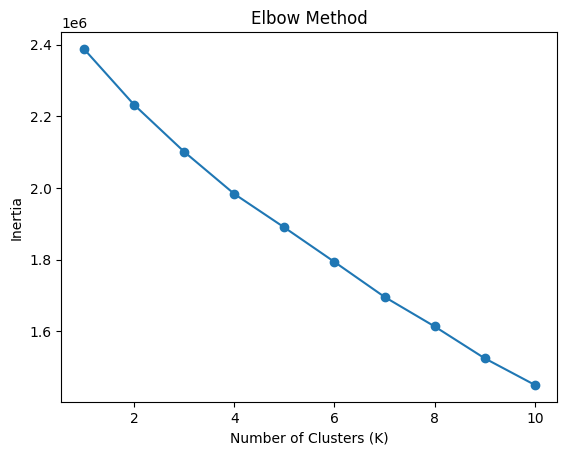

In [ ]:
#كود k-means
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

In [ ]:
df["Cluster"].value_counts()

,count
Cluster,
1,18793
3,12980
0,2959
2,1833


In [ ]:
cluster_analysis = df.groupby("Cluster").mean(numeric_only=True)
cluster_analysis

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
Cluster,,,,,,,,,,,,,,,,,,,,
0,0.446435,88.821899,2016.093951,28.472119,16.227780,1.336262,3.417371,2.136195,1.351470,0.161879,0.003042,0.009463,0.010477,0.459953,232.540755,314.861111,0.009801,162.745806,0.191957,0.770531
1,0.196616,42.310807,2016.077476,24.563242,16.090991,0.623849,1.873464,1.781834,0.012398,0.000000,0.000000,0.008833,0.047145,0.232427,230.524455,247.760112,0.037354,77.682730,0.179109,0.570478
2,0.060556,23.409711,2016.362248,21.834152,15.843426,0.514457,1.567376,1.432079,0.027823,0.001091,0.944899,0.153846,2.638298,0.288598,194.598315,215.572358,0.159302,62.413852,0.229678,0.625750
3,0.461787,168.402928,2015.920801,31.169723,15.084592,2.008166,4.955624,1.958552,0.010324,0.000077,0.000693,0.277273,0.008320,0.302928,199.405160,238.594406,1.533205,92.960920,0.039676,0.554545


In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.10875443615162325


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


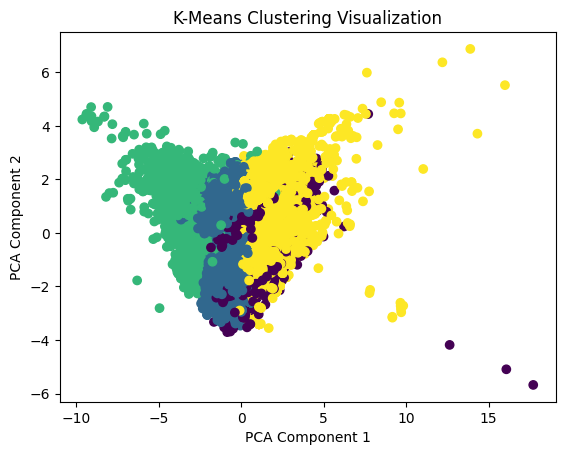

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering Visualization")
plt.show()


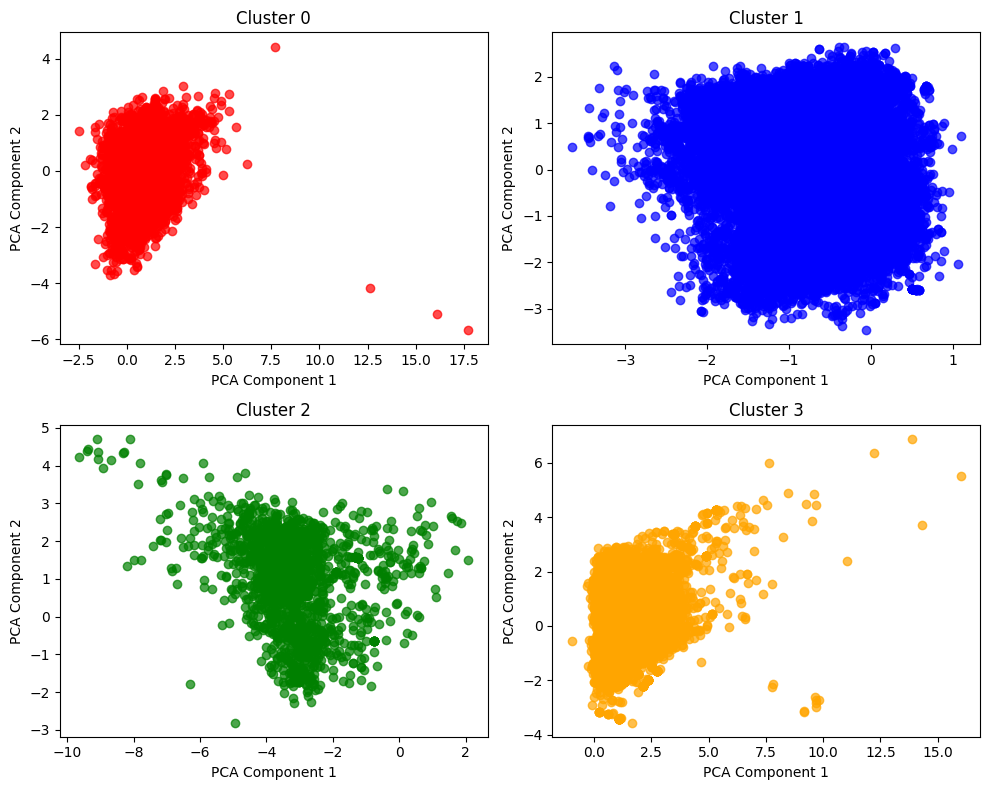

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

colors = ['red', 'blue', 'green', 'orange']

for i, c in enumerate(np.unique(clusters)):
    axes[i].scatter(
        X_pca[clusters == c, 0],
        X_pca[clusters == c, 1],
        color=colors[i],
        alpha=0.7
    )
    axes[i].set_title(f"Cluster {c}")
    axes[i].set_xlabel("PCA Component 1")
    axes[i].set_ylabel("PCA Component 2")

plt.tight_layout()
plt.show()

